<a href="https://colab.research.google.com/github/Samanga06/samanga/blob/main/kmean_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
path="/content/drive/MyDrive/dataset/clustering_data.csv"
df=pd.read_csv(path)
df.head(5)

<ipython-input-3-ebbfd66e692a>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path)


,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Peddakotla B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5689,77.85624
1,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Pinnadhari B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5281,77.857014
2,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Yerraguntapalle B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.561111,77.85715
3,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Obulareddipalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.2488,78.2588
4,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Odulapalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.24555,78.2477


In [27]:
df_gujju=df[df['StateName']=='TELANGANA']
cord= df_gujju[['Latitude', 'Longitude']].to_numpy()
cord=cord.astype(float)
print(df_gujju[['Latitude', 'Longitude','Pincode']])


          Latitude   Longitude  Pincode
138     18.6845544  78.0773742   503186
139     18.5329923   77.618717   503180
140     18.5329923   77.618717   503180
141     18.3096558  77.9466324   503187
142     18.2108201  78.4853495   503101
...            ...         ...      ...
150614   17.377222  79.0245556   508112
151046   17.949361  78.5200556   502247
151047   18.019889  78.2949444   502117
151048   17.905167  78.4610833   502334
151049    18.04325  78.1363056   502331

[5816 rows x 3 columns]


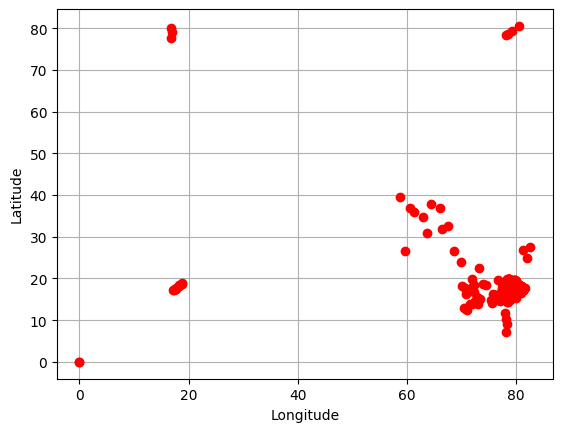

In [26]:
import matplotlib.pyplot as plt

x = cord[:, 0]
y = cord[:, 1]

plt.plot(y, x, 'ro')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


In [29]:
def k_mean(coordinates,k):
  np.random.seed(1)
  init_pts=np.random.choice(len(coordinates),k,replace=False)
  centroids=coordinates[init_pts]
  for _ in range(100):
    distances = np.zeros((coordinates,centroids))
    for i in range(coordinates):
      for j in range(centroids):
        distances[i,j]=np.linalg.norm(coordinates[i]-centroids[j])
    labels= np.argmin(distances, axis=1)
    new_centroids= np.array([coordinates[labels == i].mean(axis=0) for i in range(k)])
    if np.all(np.abs(new_centroids - centroids) < 1e-4):
            break

    centroids= new_centroids
  wcss= sum(np.sum((coordinates[labels== i]-centroids[i])**2) for i in range(k))

  return centroids, labels, wcss